# **Machine Learning Model for HOMO - LUMO Energy Gap using Molecular Descriptors**

# HOMO-LUMO Energy Gap Prediction using RDKit Molecular descriptors<br>
<b>HOMO</b> stands for <i>highest occupied molecular orbital</i> and <b>LUMO</b> stands for <i> lowest unoccupied molecular orbital</i>. HOMO-LUMO molecular orbitals are called frontier molecular orbitals. They are involved in chemical bond formation. Especially, pericyclic reactions such as cycloaddition, electrocyclic reactions, and sigmatropic rearrangement are explained using HOMO-LUMO molecular orbitals. In addition, in UV-Visible spectroscopy, the absorbance of organic molecules that have extended conjugated double bonds can be rationalized using the HOMO-LUMO energy gap of the molecules.

Explanation - https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Organic_Chemistry_(LibreTexts)/14%3A_Conjugated_Compounds_and_Ultraviolet_Spectroscopy/14.07%3A_Structure_Determination_in_Conjugated_Systems-_Ultraviolet_Spectroscopy
<div>
    <img src="https://github.com/gashawmg/RDKit-descriptors-for-HOMO-LUMO-energy-gap-prediction/blob/main/plainHOMO-LUMOEnegygap%20.jpg?raw=1" width="400")>
</div>

## **Data Set Source:-**

https://zivgitlab.uni-muenster.de/m_kueh11/fp-dm-tool

https://www.sciencedirect.com/science/article/pii/S2451929420300851#fig4

## **Molecular Descriptors**

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('Orbital_Energies_input_data.csv')
df

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
...,...,...
2899,C(CP(c1ccccc1)c1ccccc1)P(c1ccccc1)c1ccccc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCO[C@H]1C=Cc2ccccc2N1C(=O)OCC,165.098245
2902,s1ccc2ccccc12,167.958431


In [3]:
df.shape

(2904, 2)

## **Canonical Smile**

In [4]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 30.2 MB/s eta 0:00:00


In [5]:
from rdkit import Chem

In [6]:
def canonical_smiles(smiles):
  mols = [Chem.MolFromSmiles(smi) for smi in smiles]
  smiles = [Chem.MolToSmiles(mol) for mol in mols]
  return smiles

### **Trial and Check for MolFromSmiles function:-**

In [7]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

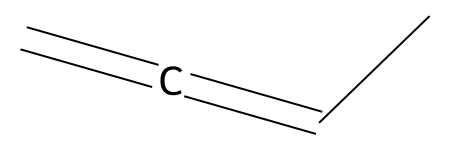

In [8]:
a = Chem.MolFromSmiles('C=C=CC')
a

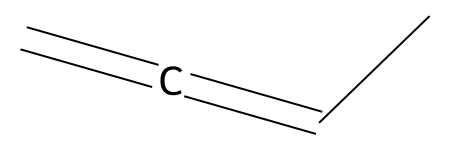

In [9]:
b = Chem.MolFromSmiles('CC=C=C')
b

In [10]:
a==b

False

### **Trial and Check for canonical_smiles function:-**

In [11]:
c = canonical_smiles(['C=C=CC'])
c

['C=C=CC']

In [12]:
d = canonical_smiles(['CC=C=C'])
d

['C=C=CC']

In [13]:
c==d

True

### **Conclusion:- canonical_smiles function satisfies the requirement than the MolFromSmiles function**

In [14]:
Canon_Smiles = canonical_smiles(df['SMILES'])
Canon_Smiles

['Cc1ccc(C(F)(F)F)cc1',
 'O=C(O)CCCCl',
 'CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O',
 'Nc1ccc(Cl)c(Cl)c1',
 'CC(C)=CCC[C@@H](C)CCO',
 'C=CC(O)C=C',
 'O=[N+]([O-])c1ccc(Cl)c([N+](=O)[O-])c1',
 'O=CC1CCCCC1',
 'C#Cc1ccc(OC)cc1',
 'Brc1cncnc1',
 'COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1[C@]12C[C@H]3C[C@H](C[C@H](C3)C1)C2',
 'N[C@@H](CC(=O)O)C(=O)O',
 'CCC#CCC',
 'Cc1cccc2cc[nH]c12',
 'CC(=O)c1cccc(C)c1',
 'Nc1ccccc1C(=O)c1ccccc1',
 'N#Cc1cccs1',
 'O=C(c1ccccc1)c1ccccc1Cl',
 'C=C(C)C(N)=O',
 'CC(=O)CC(=O)Nc1ccccc1',
 '[S]C#[S]',
 'CC(C)[C@@H](N)C(=O)O',
 'COC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)OC(C)(C)C',
 'CC(=O)C(C)C(C)=O',
 'CCCC(=O)c1ccc(Cl)cc1',
 'c1ncncn1',
 'C=C(CBr)C(=O)OCC',
 'C/C=C/CCCCC',
 'C[Si](C)(O)c1ccccc1',
 'C[C@@H](Br)c1ccccc1',
 'CC1(C)C(=O)N(Br)C(=O)N1Br',
 'CSc1ccccc1N',
 'CNCCNC',
 'O=Cc1cccc(O)c1',
 'CC(C)(N)C(=O)O',
 'CCCCO',
 'N#Cc1c(F)c(F)c(F)c(C#N)c1F',
 'C=C(C)C(=O)OCCCC',
 'CCCCOc1ccc(C(C)=O)cc1',
 'C#C[C@](C)(O)CC',
 'FC(F)(F)c1ccncc1',
 'C=C(C)C(C)=O',
 'Nc1cccnc1',


In [15]:
len(Canon_Smiles)

2904

In [16]:
df['SMILES'] = Canon_Smiles
df

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


## **Drop Duplicate Values**

In [17]:
duplicate_smiles = df[df['SMILES'].duplicated()]['SMILES'].values
len(duplicate_smiles)

31

In [18]:
df[df['SMILES'].isin(duplicate_smiles)].sort_values(by=['SMILES'])

,SMILES,Energygap
218,C1=CCCCCCC1,214.097913
2125,C1=CCCCCCC1,214.097913
1901,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
552,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
554,C=CN1CCCC1=O,190.834900
1808,C=CN1CCCC1=O,190.835527
2203,C=Cc1ccccc1,168.467969
1354,C=Cc1ccccc1,168.475499
2341,C=Cc1ccccc1,168.490559
1265,C=Cc1ccncc1,174.833420


In [19]:
df_new = df.drop_duplicates(subset=['SMILES'])
df_new

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


In [20]:
import seaborn as sb

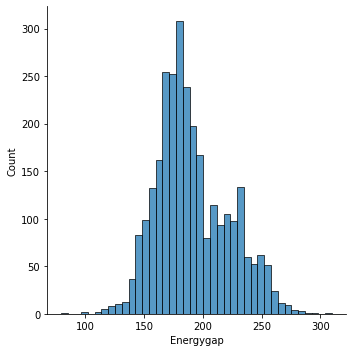

In [21]:
sb.displot(df_new.Energygap)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


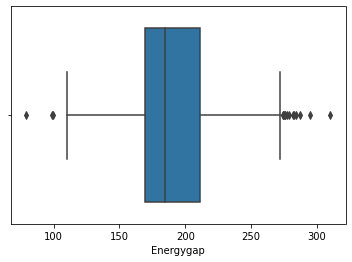

In [22]:
sb.boxplot(df_new.Energygap)

## **Molecular Descriptors using RDkit & Modred**

In [23]:
!pip install rdkit-pypi
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=020fd5839dd3845770b87166c3ae3651eefa3dba4434e9b487a257d5d0e57623
  Stored in directory: /root/.cache/pip/wheels/20/88/41/5d873c9b55dc7479f0b9951c2161d7b09be193e7228ea27309
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from mordred import Calculator, descriptors

In [25]:
def RDkit_descriptors(smiles):
  mols = [Chem.MolFromSmiles(i) for i in smiles]
  calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
  desc_names = calc.GetDescriptorNames()

  Mol_Descriptors = []
  for mol in mols:
        # Add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_Descriptors.append(descriptors)
  return Mol_Descriptors,desc_names

In [26]:
Mol_Descriptors,desc_names = RDkit_descriptors(df_new['SMILES'])

In [27]:
df_descriptors = pd.DataFrame(Mol_Descriptors,columns=desc_names)
df_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.550510,-5.076351,12.550510,1.008796,0.546828,160.138,153.082,160.049985,60,0,...,0,0,0,0,0,0,0,0,0,0
1,10.676844,-3.333333,10.676844,1.840718,0.569323,122.551,115.495,122.013457,42,0,...,0,0,0,0,0,0,0,0,0,0
2,13.050084,-4.111425,13.050084,0.722809,0.790287,361.825,341.665,361.108086,132,0,...,0,0,0,0,0,0,0,0,0,0
3,7.402685,-0.449630,7.402685,0.074321,0.582519,162.019,156.979,160.979905,48,0,...,0,0,0,0,0,0,0,0,0,0
4,8.095237,-4.484184,8.095237,1.886963,0.606746,156.269,136.109,156.151415,66,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,9.505488,-3.873136,9.505488,0.973292,0.373065,398.426,374.234,398.135324,138,0,...,0,0,0,0,0,0,0,0,0,0
2869,7.651157,-0.170718,7.651157,0.017477,0.625891,213.099,208.059,211.929533,50,0,...,0,0,0,0,0,0,0,1,0,0
2870,13.017078,-3.813937,13.017078,0.325694,0.823664,247.294,230.158,247.120843,96,0,...,0,0,0,0,0,0,0,0,0,0
2871,7.592407,-0.348333,7.592407,0.030556,0.519376,134.203,128.155,134.019021,44,0,...,0,0,0,0,0,0,0,1,0,0


## **Molecular Fingerprints**

In [28]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [29]:
Morgan_Fpts = morgan_fpts(df_new['SMILES'])
Morgan_Fpts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
Morgan_Fpts.shape

(2873, 2048)

In [31]:
Morgan_Fingerprints = pd.DataFrame(Morgan_Fpts,columns=['Col_{}'.format(i) for i in range(Morgan_Fpts.shape[1])])
Morgan_Fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Descriptors Calculation using Modred-1826 Descriptors**

In [32]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    df = calc.pandas(mols)
    return df

In [33]:
mordred_descriptors = All_Mordred_descriptors(df_new['SMILES'])

100%|██████████| 2873/2873 [12:21<00:00,  3.88it/s]


In [34]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.302711,7.763360,0,0,12.527341,2.311476,4.622953,12.527341,1.138849,3.302522,...,9.182249,41.326257,160.049985,8.891666,152,13,54.0,59.0,5.284722,2.333333
1,4.461420,4.736714,1,0,7.727407,1.931852,3.863703,7.727407,1.103915,2.752227,...,7.321850,31.336140,122.013457,8.715247,52,4,24.0,22.0,3.861111,1.833333
2,19.038123,14.818400,1,0,30.648742,2.324224,4.648448,30.648742,1.225950,4.118873,...,9.931735,59.295845,361.108086,8.024624,1882,35,124.0,139.0,9.729167,5.486111
3,6.651690,6.355891,0,0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,8.806724,37.839725,160.979905,11.498565,84,10,42.0,46.0,4.083333,2.027778
4,7.399237,7.388977,0,0,12.133645,2.047810,4.095621,12.133645,1.103059,3.219224,...,8.131825,38.565088,156.151415,5.037142,194,9,42.0,41.0,5.472222,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,21.758550,17.000581,0,0,38.253985,2.374938,4.749876,38.253985,1.366214,4.258939,...,10.073357,62.971588,398.135324,7.656449,2014,41,142.0,164.0,6.166667,6.361111
2869,7.806684,7.343579,0,0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,211.929533,14.128636,105,12,52.0,61.0,2.833333,2.222222
2870,13.382658,11.741399,0,0,22.978744,2.442763,4.885526,22.978744,1.276597,3.800055,...,9.763593,50.871918,247.120843,7.060596,574,28,88.0,103.0,6.055556,4.277778
2871,7.030628,6.547610,0,0,12.170709,2.322596,4.516123,12.170709,1.352301,3.160409,...,8.914761,51.887188,134.019021,8.934601,79,9,46.0,53.0,1.972222,2.027778


## **Removal of Highly Correlated Features**

In [35]:
def remove_correlated_features(descriptors):
    # Calculate correlation
    correlated_matrix = descriptors.corr().abs()

    # Upper triangle of correlation matrix
    upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(np.bool))

    # Identify columns that have above 0.9 values of correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.9)]
    print(to_drop)
    descriptors_correlated_dropped = descriptors.drop(columns=to_drop, axis=1)
    return descriptors_correlated_dropped    

In [37]:
df_descriptors_new = remove_correlated_features(df_descriptors)
df_descriptors_new

['MaxAbsEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_LOGPHI', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi4v', 'LabuteASA', 'SlogP_VSA5', 'SlogP_VSA6', 'EState_VSA1', 'VSA_EState1', 'HeavyAtomCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'MolMR', 'fr_COO2', 'fr_C_O', 'fr_Nhpyrrole', 'fr_benzene', 'fr_nitro_arom', 'fr_phenol', 'fr_phenol_noOrthoHbond']


<ipython-input-35-eb8fd350a939>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(np.bool))


,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.550510,-5.076351,1.008796,0.546828,160.138,60,0,0.415910,-0.166138,1.272727,...,0,0,0,0,0,0,0,0,0,0
1,10.676844,-3.333333,1.840718,0.569323,122.551,42,0,0.302884,-0.481230,2.142857,...,0,0,0,0,0,0,0,0,0,0
2,13.050084,-4.111425,0.722809,0.790287,361.825,132,0,0.346953,-0.478304,1.320000,...,0,0,0,0,0,0,0,0,0,0
3,7.402685,-0.449630,0.074321,0.582519,162.019,48,0,0.156217,-0.398685,1.444444,...,0,0,0,0,0,0,0,0,0,0
4,8.095237,-4.484184,1.886963,0.606746,156.269,66,0,0.210037,-0.396366,1.909091,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,9.505488,-3.873136,0.973292,0.373065,398.426,138,0,0.062956,-0.062223,0.428571,...,0,0,0,0,0,0,0,0,0,0
2869,7.651157,-0.170718,0.017477,0.625891,213.099,50,0,0.073986,-0.143780,1.400000,...,0,0,0,0,0,0,0,1,0,0
2870,13.017078,-3.813937,0.325694,0.823664,247.294,96,0,0.416203,-0.449393,1.555556,...,0,0,0,0,0,0,0,0,0,0
2871,7.592407,-0.348333,0.030556,0.519376,134.203,44,0,0.073985,-0.143822,1.222222,...,0,0,0,0,0,0,0,1,0,0


## **Removal of Low Variance Thresold**

In [38]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

In [40]:
# Molecular Features
X = remove_low_variance(df_descriptors_new, threshold=0.1)
X 

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MolWt,NumValenceElectrons,NumRadicalElectrons,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_amide,fr_aniline,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_para_hydroxylation
0,12.550510,-5.076351,1.008796,160.138,60,0,1.272727,1.163350e+01,-0.243464,4.873166e-17,...,0,0,0,0,0,3,0,0,0,0
1,10.676844,-3.333333,1.840718,122.551,42,0,2.142857,8.570397e-16,-0.185453,-4.511837e-17,...,0,0,0,0,0,1,0,0,0,0
2,13.050084,-4.111425,0.722809,361.825,132,0,1.320000,1.085711e+01,-0.244322,1.945557e-17,...,1,0,0,0,1,1,0,0,0,0
3,7.402685,-0.449630,0.074321,162.019,48,0,1.444444,1.263818e+01,-0.140224,5.113174e-01,...,0,1,0,0,0,2,0,0,0,0
4,8.095237,-4.484184,1.886963,156.269,66,0,1.909091,-2.457147e-15,-0.247117,-3.630230e-02,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,9.505488,-3.873136,0.973292,398.426,138,0,0.428571,1.045759e+01,-0.178890,-5.796238e-17,...,0,0,0,0,0,0,0,0,0,0
2869,7.651157,-0.170718,0.017477,213.099,50,0,1.400000,1.260076e+01,-0.091328,5.549126e-01,...,0,0,1,0,0,1,0,0,0,0
2870,13.017078,-3.813937,0.325694,247.294,96,0,1.555556,1.012899e+01,-0.249074,-3.496166e-17,...,1,1,1,0,2,0,0,0,0,1
2871,7.592407,-0.348333,0.030556,134.203,44,0,1.222222,1.124984e+01,-0.092700,5.076045e-01,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Labels or Targets
Y = df_new.Energygap
Y

0       197.749421
1       247.493942
2       164.712327
3       169.027707
4       209.569808
           ...    
2899    168.649319
2900    162.928319
2901    165.098245
2902    167.958431
2903    188.369417
Name: Energygap, Length: 2873, dtype: float64

## **Train-Test Data Split (70/30)**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## **Identify Best ML Model for this Data Set**

In [49]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [51]:
lregs = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, prediction_tests = lregs.fit(X_train, X_test, Y_train, Y_test)

 95%|█████████▌| 40/42 [04:27<00:12,  6.20s/it]

[01:05:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [04:29<00:00,  6.43s/it]


In [52]:
prediction_tests

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.90,0.91,9.03,1.18
HistGradientBoostingRegressor,0.90,0.91,9.18,1.33
ExtraTreesRegressor,0.89,0.91,9.35,6.13
RandomForestRegressor,0.87,0.89,10.28,6.22
GradientBoostingRegressor,0.87,0.88,10.43,2.43
XGBRegressor,0.87,0.88,10.44,0.92
BaggingRegressor,0.85,0.87,10.91,1.18
PoissonRegressor,0.83,0.85,11.85,0.11
LassoLarsIC,0.82,0.84,12.00,0.13


## **LGBMRegressor Model**

In [53]:
from lightgbm import LGBMRegressor

In [54]:
lgbm = LGBMRegressor()

In [57]:
lgbm_opt = LGBMRegressor(max_depth=5, min_samples_split=4, n_estimators= 800, max_features='auto')

In [58]:
# Train the model and predict the energy gap using X_test 
lgbm_opt.fit(X_train, Y_train)
lgbm_predict = lgbm_opt.predict(X_test)

## **HistGradientBoostingRegressor	Model**

In [59]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [60]:
gbr = HistGradientBoostingRegressor()

In [61]:
gbr_opt = HistGradientBoostingRegressor(learning_rate= 0.22)

In [62]:
# Train the model and predict the energy gap using X_test 
gbr_opt.fit(X_train, Y_train)
gbr_predict = gbr_opt.predict(X_test)

## **Taking Average of Both the Optimized Models**

In [65]:
avg_predict = (lgbm_predict + gbr_predict)/2

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### **Mean Absolute Error**

In [86]:
# Model performance using MAE
MAE = mean_absolute_error(Y_test, avg_predict)
print('MAE:', MAE)

MAE: 6.099873284629607


### **Actual vs Predicted**

In [67]:
df_model = pd.DataFrame()

In [68]:
df_model['Actual'] = np.array(Y_test)
df_model['Predicted'] = avg_predict

In [69]:
df_model

,Actual,Predicted
0,189.29,186.69
1,199.23,197.14
2,169.53,169.88
3,219.88,218.23
4,211.16,202.51
...,...,...
857,177.25,180.13
858,270.10,232.82
859,196.75,192.11
860,175.15,171.73


### **R^2**

In [88]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(Y_test, avg_predict)
print('R^2:', R2)

R^2: 0.919826862965593


## **ML Model Set**

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

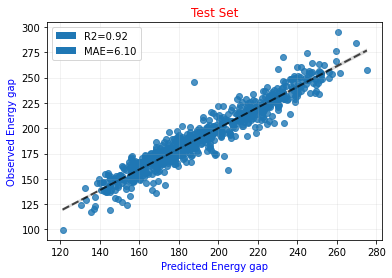

In [89]:
sb.regplot(x=avg_predict, y=Y_test, line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Energy gap', color='blue')
plt.ylabel('Observed Energy gap', color ='blue')
plt.title("Test Set", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
plt.legend(handles=[R2, MAE])

## **Saving the Model**

In [91]:
from sklearn.preprocessing import StandardScaler

In [94]:
import pickle
with open('lgbm_model.pkl','wb') as f:
          pickle.dump(lgbm_opt,f)
        
with open('hgbr_model.pkl','wb') as f:
          pickle.dump(gbr_opt,f)


## **Loading the Model**

In [95]:
with open('lgbm_model.pkl','rb') as f:
       model_lgbm = pickle.load(f)
        
with open('hgbr_model.pkl','rb') as f:
    model_hgbr = pickle.load(f)